In [1]:
%run C:\Users\HSS\dd.py

## 1. 최적화 문제

\begin{align}
x^{\ast} = \arg \min_x f(x) 
\tag{5.1.2}
\end{align}

#### Q1. *최적화. 그냥 그래프로 해결하면 되는 것 아닐까?*

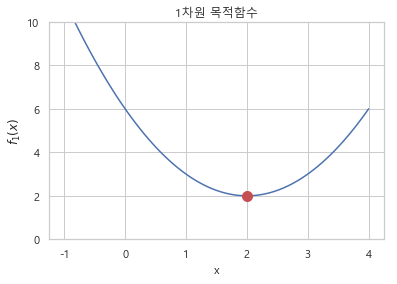

In [2]:
def f1(x):
    return (x - 2) ** 2 + 2

xx = np.linspace(-1, 4, 100)
plt.plot(xx, f1(xx))
plt.plot(2, 2, 'ro', markersize=10)
plt.ylim(0, 10)
plt.xlabel("x")
plt.ylabel("$f_1(x)$")
plt.title("1차원 목적함수")
plt.show()

- 이렇게 함수의 그래프를 그려 최소를 판단하는 것과 같이 간단한 문제처럼 보이지만
- 컴퓨터로 그래프를 그린다는 것은 상당한 노가다 작업이고,
- 차원이 3만 넘어가도 시각화는 불가능하다. (물론 연산량도 급격히 늘어난다)

### 로젠브룩 함수
\begin{align}
f(x, y) = (1 − x )^2 + 100(y − x^2)^2
\tag{5.1.3}
\end{align}

In [29]:
def f2(x,y):
    return (1-x)**2 + 100*(y-x**2)**2

xx = np.linspace(-4,4,800)
yy = np.linspace(-3,3,600)
#xx,yy의 grid를 만든다. 벡터평면를 만든다고 봐도 무방
X,Y = np.meshgrid(xx,yy)
#X,Y가 만든 모든 좌표평면에서의 함수값 
Z = f2(X,Y)

levels=np.logspace(-1, 3, 10)

- contourf 는 등고를 색으로 표현해주고 contour는 선으로만 표시하는 것 같다.
- level 은 특정 높이에서의 등고를 반환하는듯

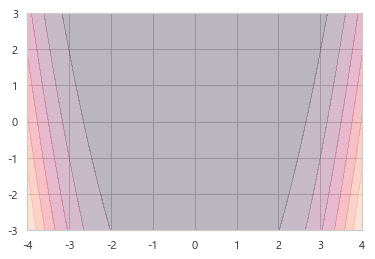

In [17]:
plt.contourf(X,Y,Z, alpha = 0.3, #level = levels 
            )

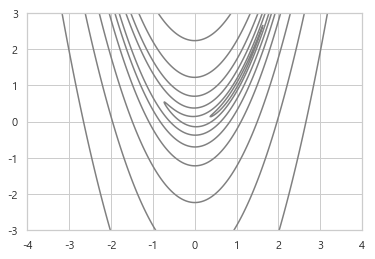

In [30]:
plt.contour(X, Y, Z, colors="gray",
            levels=[0.4, 3, 15, 50, 150, 500, 1500, 5000])

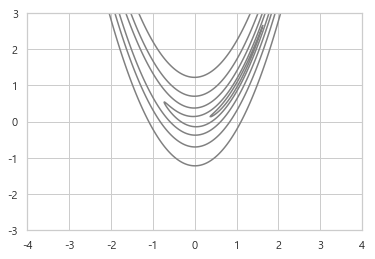

In [34]:
plt.contour(X, Y, Z, colors="gray",
            levels=[0.4, 3, 15, 50, 150])

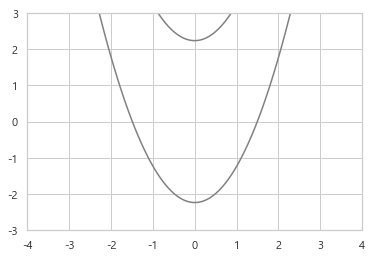

In [36]:
plt.contour(X, Y, Z, colors="gray",
            levels=[500])

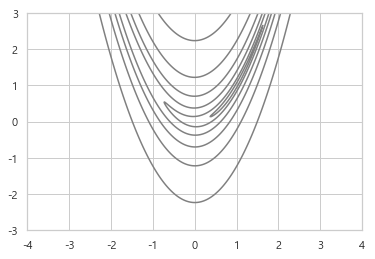

In [37]:
plt.contour(X, Y, Z, colors="gray",
            levels=[0.4, 3, 15, 50, 150, 500])

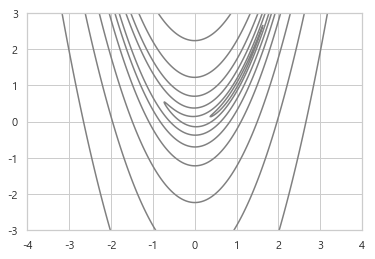

In [38]:
plt.contour(X, Y, Z, colors="gray",
            levels=[0.4, 3, 15, 50, 150, 500, 1500, 5000])

## 수치적 최적화

- 두가지 문제를 해결해야 한다.
    - 현재 위치가 최적인가?
        - 지금의 위치가 최적인가 아닌가의 필요조건은 `g = 0`이다.
        - `g = 0`인 모든 점이 최적점진 않지만, 최적점들은 모두 `g = 0`을 만족하는 점들이다.
    - 다음 점은 어디로 갈 것인가?
        - 일차 도함수값을 사용하는 경우
        - \begin{align}
            x_{k+1} = x_{k} - \mu \nabla f(x_k) = x_{k} - \mu g(x_k) 
            \tag{5.1.11}
            \end{align}
        
        - 최적화는 이동 방향과 이동 거리(스텝)을 동시에 해결해야 하는데, 일차 도함수값을 사용한다면 항상 옳은 방향으로 이동한다. 그러나 $\mu g(x_k)$인 스텝을 찾아줘야 하는 문제가 있다.
        - 이차 도함수값을 사용하는 뉴턴 방법의 경우
            \begin{align}
            {x}_{n+1} = {x}_n - [{H}f({x}_n)]^{-1} \nabla f({x}_n) 
            \tag{5.1.12}
            \end{align}
         - 이 방법은 목적함수를 2차함수라는 가정하에 한번에 최적점을 찾는다.
         - 그러나 변곡점 부분에서 $[{H}f({x}_n)]^{-1}$이 무한대 혹은 매우 큰 값을 갖기 때문에 불안정한 움직임을 보인다.

### Gradient Descent 를 사용한 최적화

\begin{align}
\text 목적함수 = (x-2)^2 +2
\end{align}

In [40]:
def f1d(x):
    '''f1(x)의 도함수'''
    return 2*(x-2.0)

1차 시도: x_1 = 0.00, g_1 = -4.00
2차 시도: x_1 = 1.60, g_1 = -0.80
3차 시도: x_3 = 1.92, g_3 = -0.16
4차 시도: x_3 = 1.98, g_3 = -0.03
5차 시도: x_3 = 2.00, g_3 = -0.01


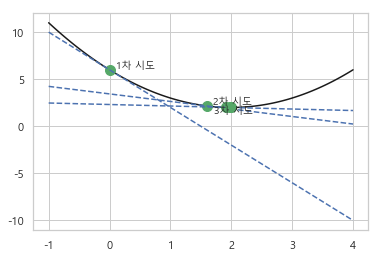

In [49]:
xx = np.linspace(-1, 4, 100)

plt.plot(xx, f1(xx), 'k-')
# step size
mu = 0.4

# k = 0
x = 0
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x + 0.1, f1(x) + 0.1, "1차 시도")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("1차 시도: x_1 = {:.2f}, g_1 = {:.2f}".format(x, f1d(x)))

#k = 1
x = x - mu*f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x + 0.1, f1(x) + 0.1, "2차 시도")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("2차 시도: x_1 = {:.2f}, g_1 = {:.2f}".format(x, f1d(x)))

# k = 2
x = x - mu * f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x - 0.2, f1(x) - 0.7, "3차 시도")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("3차 시도: x_3 = {:.2f}, g_3 = {:.2f}".format(x, f1d(x)))

# k = 3
x = x - mu * f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
# plt.text(x - 0.2, f1(x) - 0.7, "4차 시도")
# plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("4차 시도: x_3 = {:.2f}, g_3 = {:.2f}".format(x, f1d(x)))

# k = 4
x = x - mu * f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
# plt.text(x - 0.2, f1(x) - 0.7, "5차 시도")
# plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("5차 시도: x_3 = {:.2f}, g_3 = {:.2f}".format(x, f1d(x)))

plt.show()


#### 최적점 근처에서는 loss가 줄어드는 폭이 급감한다. 속도가 너무 느리다면 mu를 적절히 조절하면 괜찮지만 mu의 적절한 조절은 어려운 문제이다.

#### mu가 너무 크다면 벌어지는 현상은 다음과 같다. loss가 진동하거나 최적점이 예상치 못한 구간으로 튀어버린다.

1차 시도: x_1 = 0.00, g_1 = -4.00
2차 시도: x_2 = 4.40, g_2 = 4.80
3차 시도: x_3 = -0.88, g_3 = -5.76


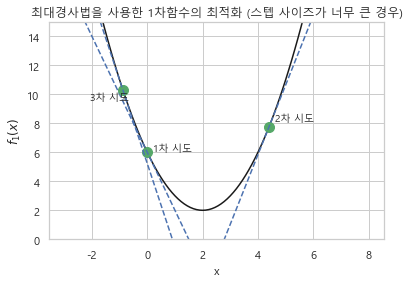

In [51]:
xx = np.linspace(-3, 8, 100)

plt.plot(xx, f1(xx), 'k-')

# step size (너무 큰 값!)
mu = 1.1

# k = 0
x = 0
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x + 0.2, f1(x) + 0.1, "1차 시도")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("1차 시도: x_1 = {:.2f}, g_1 = {:.2f}".format(x, f1d(x)))

# k = 1
x = x - mu * f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x + 0.2, f1(x) + 0.4, "2차 시도")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("2차 시도: x_2 = {:.2f}, g_2 = {:.2f}".format(x, f1d(x)))

# k = 2
x = x - mu * f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x - 1.2, f1(x) - 0.7, "3차 시도")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("3차 시도: x_3 = {:.2f}, g_3 = {:.2f}".format(x, f1d(x)))

plt.ylim(0, 15)
plt.xlabel("x")
plt.ylabel("$f_1(x)$")
plt.title("최대경사법을 사용한 1차함수의 최적화 (스텝 사이즈가 너무 큰 경우)")
plt.show()

### 로센브룩 함수의 도함수를 구하고 이를 활용해 뉴튼 방법을 사용하자.
\begin{align}
f(x, y) = (1 − x )^2 + 100(y − x^2)^2
\tag{5.1.3}
\end{align}


In [76]:
def f2d(x,y):
    return np.array((2*(x-1) - 400*x*(y-x**2), 200*(y-x**2)))


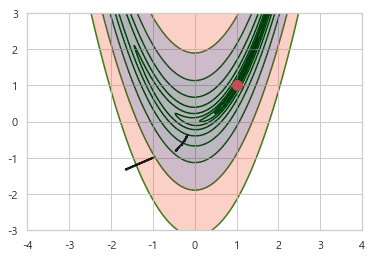

In [89]:
xx = np.linspace(-4, 4, 800)
yy = np.linspace(-3, 3, 600)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

levels = np.logspace(-1, 3, 10)
plt.contourf(X, Y, Z, alpha=0.3, levels=levels)
plt.contour(X, Y, Z, colors="green", levels=levels, zorder=0)
plt.plot(1, 1, 'ro', markersize=10)


mu = 8e-4  # step size
s = 0.95  # for arrowhead drawing

x, y = -1, -1
for i in range(5):
    g = f2d(x, y)
#     plt.arrow(x, y, -s * mu * g[0], -s * mu * g[1],
#               head_width=0.04, head_length=0.04, fc='k', ec='k', lw=2)
    plt.arrow(x, y, mu*g[0], mu*g[1],fc='k', ec='k', lw=2)
    x = x - mu * g[0]
    y = y - mu * g[1]
    
    
plt.show()

In [84]:
-s * mu * g[0]

0.023007760088752032

In [85]:
mu * g[0]

-0.024218694830265296

In [86]:
 g[0]

-30.27336853783162